<a href="https://colab.research.google.com/github/ZiyueNie/19ma573ZiyueNie/blob/master/src/hw6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Given**
$$p_1(x) =\frac{1}{C} (2\cdot I_{(0,\frac{1}{100}]}(x)+1\cdot I_{(\frac{1}{100},1)}(x))$$
**1.Find $F_1$**
<br>Since $p_1$ is a PDF, then we have
$$\int_{-\infty}^{\infty}p_1(x)dx=\frac{1}{C}(2\cdot\frac{1}{100}+(1-\frac{1}{100}))=\frac{101}{100C}=1 $$
So  $C=\frac{101}{100}$. 
<br>
Since if $x\leq0$,$F_1=0$,
<br>
if $0<x\leq\frac{1}{100}$,$F_1=\int_{0}^{x}\frac{2}{C}dx=\frac{200}{101}x$,
<br>
if $\frac{1}{100}<x\leq1$,$F_1=\int_{0}^{1/100}\frac{2}{C}dx+\int_{1/100}^{1}\frac{x}{C}dx=\frac{100}{101}x+\frac{1}{101}$.
<br>
So we have
<br>
$$F_1(x)=\begin{cases}0\quad&\text{if $x\leq0$}\\
\frac{200}{101}x&\text{if $0<x\leq\frac{1}{100}$}\\
\frac{100}{101}x+\frac{1}{101}&\text{if $\frac{1}{100}<x\leq1$}
\end{cases} $$
**2.Find $F_1^{-1}$**
<br>
$$F_1^{-1}(x)=\begin{cases}
\frac{101}{200}x&\text{if $0<x\leq\frac{2}{101}$}\\
\frac{101}{100}x-\frac{1}{100}&\text{if $\frac{2}{101}<x\leq1$}
\end{cases}$$

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss


In [0]:
def h(x):
  if x>0 and x<=1/100:
    return 100
  else:
    return 1

def p1(x):
  if x>0 and x<=1/100:
    return 200/101
  if x>1/100 and x<1:
    return 100/101
  
def F_inverse(x):
  if 0<x and x<=2/101:
    return 101*x/200
  else:
    return (101/100)*x-1/100

  

**3.Define inverse_transform_sampling function**

In [0]:
def inverse_transform_sampling(n):
  Y=np.random.uniform(0,1,n)
  X=[]
  for Y_i in Y:
    X.append(F_inverse(Y_i))
  return X
 

**4.Define importance_sampling_integral  function**
<br>
Since 
$$\bar \alpha_n=\frac{1}{n}\sum_{i=1}^{n}h(X_i)\cdot\frac{p(X_i)}{p_1(X_i)}$$
<br>and $p(x)=1$

In [0]:
def importance_sampling_integral(n):
  X=inverse_transform_sampling(n)
  Sum=0
  for X_i in X:
    Sum=Sum+h(X_i)/p1(X_i)
  return Sum/n

In [0]:
#use the similar method in hw6_1
m=100 #fix m =100
alpha_ij=[]
for i in range(5,10):
  alpha_i=[]
  for j in range(m): #run m times of omc_integral(n=2^i)
    alpha_i.append(importance_sampling_integral(2**i))
  alpha_ij.append(alpha_i) #store it into alpha_ij
#Compute standard deviation of alpha_ij, save it to sigma_i
sigma_i=[]
for alpha_i in alpha_ij:
  sigma_i.append(np.std(alpha_i))


**5.Demonstrate the convergence rate of the above important sampling**

----->>>the convergence order is 0.5573482670624575


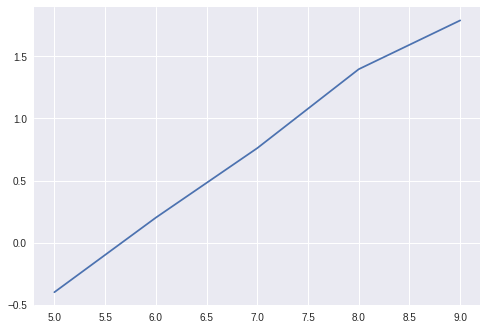

In [6]:
xx=[i for i in range(5,10)]
yy=-np.log2(sigma_i)
plt.plot(xx,yy)
out = ss.linregress(xx,yy)
print('----->>>the convergence order is ' + str(out[0]))

**6.Find a pdf $p_2$ better than $p_1$**
<br>let $$p_2(x) =\frac{1}{C} (100\cdot I_{(0,\frac{1}{100}]}(x)+1\cdot I_{(\frac{1}{100},1)}(x))$$
<br> where $C=\frac{199}{100}$
<br>then
$$F_2(x)=\begin{cases}0\quad&\text{if $x\leq0$}\\
\frac{100}{199}100x&\text{if $0<x\leq\frac{1}{100}$}\\
\frac{100}{199}x+\frac{99}{199}&\text{if $\frac{1}{100}<x\leq1$}
\end{cases} $$

<br>
$$F_2^{-1}(x)=\begin{cases}
\frac{199}{10000}x&\text{if $0<x\leq\frac{100}{199}$}\\
\frac{199}{100}x-\frac{99}{100}&\text{if $\frac{100}{199}<x\leq1$}
\end{cases}$$

----->>>the convergence order is 0.1327687364176043


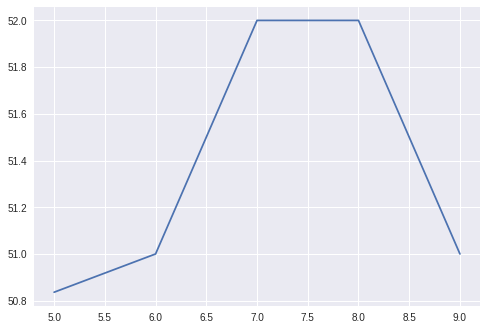

In [9]:
def p2(x):
  if x>0 and x<=1/100:
    return 10000/199
  if x>1/100 and x<1:
    return 100/199
  
def F2_inverse(x):
  if 0<x and x<=100/199:
    return 199*x/10000
  else:
    return (199/100)*x-99/100

def importance_sampling_integral_2(n):
  X=inverse_transform_sampling(n)
  Sum=0
  for X_i in X:
    Sum=Sum+h(X_i)/p2(X_i)
  return Sum/n

m=100 #fix m =100
alpha_ij_2=[]
for i in range(5,10):
  alpha_i_2=[]
  for j in range(m): #run m times of omc_integral(n=2^i)
    alpha_i_2.append(importance_sampling_integral_2(2**i))
  alpha_ij_2.append(alpha_i_2) #store it into alpha_ij
#Compute standard deviation of alpha_ij, save it to sigma_i
sigma_i_2=[]
for alpha_i_2 in alpha_ij_2:
  sigma_i_2.append(np.std(alpha_i_2))

  
xx=[i for i in range(5,10)]
yy=-np.log2(sigma_i_2)
plt.plot(xx,yy)
out = ss.linregress(xx,yy)
print('----->>>the convergence order is ' + str(out[0]))